In [1]:
from syft.service.action.action_graph_service import ActionGraphService
from syft.service.action.action_graph import InMemoryActionGraphStore, InMemoryGraphConfig, InMemoryStoreClientConfig

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/shubham/PySyft


In [2]:
import syft as sy

In [3]:
store_config = InMemoryGraphConfig()

In [4]:
graph_store = InMemoryActionGraphStore(store_config=store_config)

In [5]:
action_graph_service = ActionGraphService(store=graph_store)

In [6]:
sy.deserialize(sy.serialize(graph_store, to_bytes=True), from_bytes=True)

In [7]:
from syft.service.context import AuthedServiceContext
from syft.node.credentials import SyftSigningKey

In [8]:
from syft.service.action.action_graph import Action
from syft.service.action.numpy import NumpyArrayObject, ActionObject
import numpy as np

In [9]:
signing_key = SyftSigningKey.generate()
authed_context = AuthedServiceContext(credentials=signing_key.verify_key)

In [10]:
action_obj_a = ActionObject.from_obj([1, 2, 3])
action_obj_b = ActionObject.from_obj([2, 3, 4])

In [11]:
action_obj_a.id

<UID: 67d2be0cfacd4d35b541d94c1e070592>

In [12]:
action1 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_a.syft_lineage_id],
    kwargs={}
)
action1

```python
class Action:
  id: str = 2d37684678824c54baac895e275a5c23
  path: str = "action.execute"
  op: str = "np.array"
  remote_self: str = None
  args: str = [<LineageID: 67d2be0cfacd4d35b541d94c1e070592 - 1429833181450825561>]
  kwargs: str = {}
  result_id: str = 2a87426007cb456495a4431bc9a7c778

```

In [13]:
action2 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_b.syft_lineage_id],
    kwargs={}
)
action2

```python
class Action:
  id: str = a73be2523d644a62b11e2686103ec2df
  path: str = "action.execute"
  op: str = "np.array"
  remote_self: str = None
  args: str = [<LineageID: bd5c1c2b37a44db5911ec188e1de6a72 - 2017510252299212877>]
  kwargs: str = {}
  result_id: str = 09b3416e0fb0412c803860ae2f19f741

```

In [14]:
action_graph_service.add_action(context=authed_context, action=action1)

```python
class NodeActionData:
  id: str = 2d37684678824c54baac895e275a5c23
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 11:55:40
  updated_at: str = None
  user_verify_key: str = e52353ad4db4b263f043fc2d0292c93de5abedc166c531b011d7eeb4d5fbbd10

```

In [15]:
action_graph_service.add_action(context=authed_context, action=action2)

```python
class NodeActionData:
  id: str = a73be2523d644a62b11e2686103ec2df
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 11:55:41
  updated_at: str = None
  user_verify_key: str = e52353ad4db4b263f043fc2d0292c93de5abedc166c531b011d7eeb4d5fbbd10

```

In [16]:
import networkx as nx

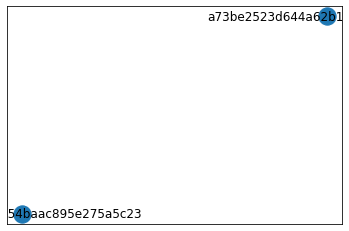

In [17]:
nx.draw_networkx(action_graph_service.store.graph.db)

In [18]:
action_res = Action(
    path="action.execute",
    op="__add__",
    remote_self=action1.result_id,
    args=[action2.result_id],
    kwargs={}
)
action_res

```python
class Action:
  id: str = fc5669ffce924263adc24e29cff7e9e5
  path: str = "action.execute"
  op: str = "__add__"
  remote_self: str = 2a87426007cb456495a4431bc9a7c778
  args: str = [<LineageID: 09b3416e0fb0412c803860ae2f19f741 - 995977346603024551>]
  kwargs: str = {}
  result_id: str = d1c5ae3c42c246d3b78ca18a31fb4bc4

```

In [19]:
action_graph_service.add_action(context=authed_context, action=action_res)

```python
class NodeActionData:
  id: str = fc5669ffce924263adc24e29cff7e9e5
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 11:55:42
  updated_at: str = None
  user_verify_key: str = e52353ad4db4b263f043fc2d0292c93de5abedc166c531b011d7eeb4d5fbbd10

```

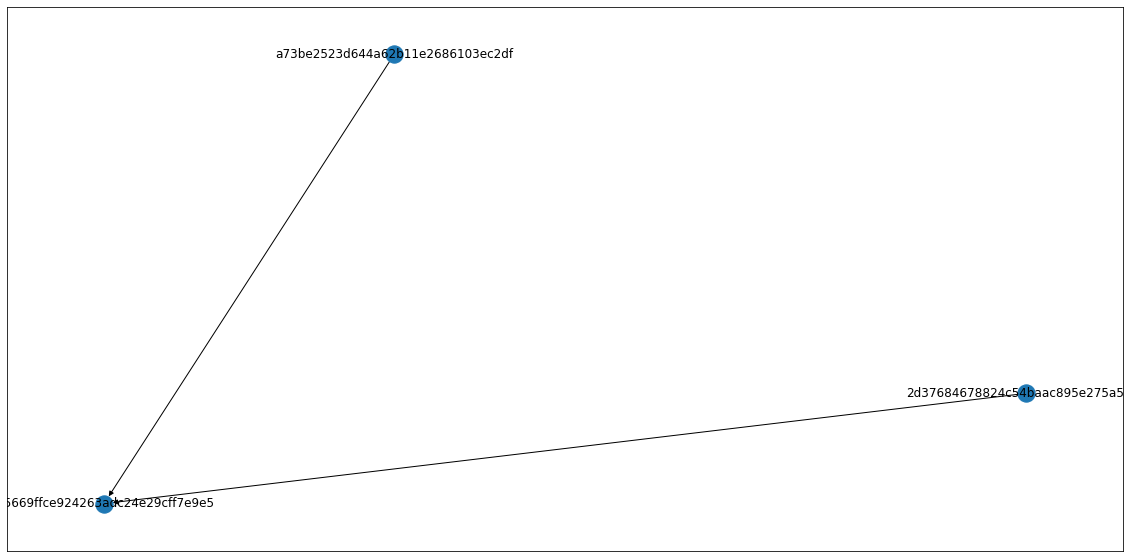

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
action_graph_service.store.graph.visualize()

In [21]:
from syft.service.action.action_graph import ActionStatus

In [22]:
action_graph_service.get_by_action_status(context=authed_context, status=ActionStatus.PROCESSING)

,type,id
0,<UID: 2d37684678824c54baac895e275a5c23>,None
1,<UID: a73be2523d644a62b11e2686103ec2df>,None
2,<UID: fc5669ffce924263adc24e29cff7e9e5>,None


In [23]:
action_graph_service.get_by_verify_key(context=authed_context, verify_key=signing_key.verify_key)

,type,id
0,<UID: 2d37684678824c54baac895e275a5c23>,None
1,<UID: a73be2523d644a62b11e2686103ec2df>,None
2,<UID: fc5669ffce924263adc24e29cff7e9e5>,None


In [ ]:
# class ActionGraph:
#     def __init__(self):
#         self.graph = nx.DiGraph()
        
#     def add(self, node: ActionGraphObject):
#         self.graph.add_node(node.id, data=node)
        
#     def add_relationship(self, nodeA: ActionGraphObject, nodeB: ActionGraphObject):
#         self.graph.add_edge(nodeA, nodeB)
        
#     def remove_node(self, node: ActionGraphObject):
#         self.graph.remove_node(node)
    
#     def remove_edge(self, node: ActionGraphObject):
#         self.graph.remove_edge(node)
        
#     def neighbors_for(self, node: ActionGraphObject):
#         return list(self.graph.neighbors(node))
        
#     def visualize(self, arrows: bool = True):
#         return nx.draw_networkx(self.graph)
        
#     def remove_all_nodes_from(self, node: ActionGraphObject):
#         all_adjacent_neighbors: list = []
            
#         def find_adjacent_neighbors(node: ActionGraphObject, neighbors: set):           
#             if not self.graph.neighbors(node):
#                 return 

#             my_neighbors = self.graph.neighbors(node)
#             for n in my_neighbors:
#                 if n not in neighbors:
#                     neighbors.add(n)
#                     self.find_adjacent_neighbors(n, neighbors)
                
#         find_adjacent_neighbors(all_adjacent_neighbors)
#         return all_adjacent_neighbors